## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)



#### Concept
DBSCAN is an unsupervised clustering algorithm that groups together points that are closely packed, and marks points that are in low-density regions as outliers. It is particularly effective for identifying clusters of arbitrary shape and handling noise in the data.

#### Key Parameters
- Epsilon (ε): The maximum distance between two points to be considered neighbors.
- MinPts: The minimum number of points required to form a dense region (a cluster).

#### Key Terms
- Core Point: A point with at least MinPts neighbors within a radius of ε.
- Border Point: A point that is not a core point but is within the neighborhood of a core point.
- Noise Point: A point that is neither a core point nor a border point (outlier).

#### Algorithm Steps
1. Identify Core Points: For each point in the dataset, find its ε-neighborhood. If it contains at least MinPts points, mark it as a core point.
2. Expand Clusters: From each core point, recursively collect directly density-reachable points to form a cluster.
3. Label Border and Noise Points: Points that are reachable from core points but not core points themselves are labeled as border points. Points that are not reachable from any core point are labeled as noise.

#### Implementation

Let's consider an example using Python and its libraries.

##### Example
Suppose we have a dataset with points in a 2D space, and we want to cluster them using DBSCAN.



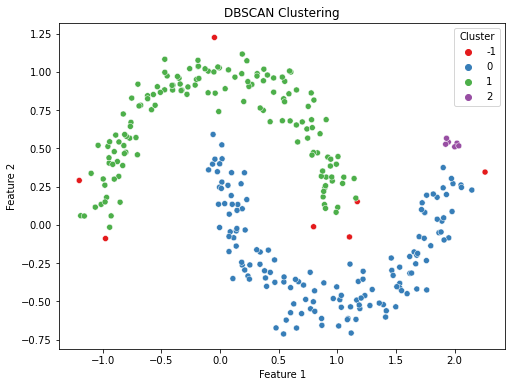

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data (make_moons dataset)
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

# Applying DBSCAN
epsilon = 0.15     # try to change the value of epsilon
min_samples = 5
db = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = db.fit_predict(X)

# Adding cluster labels to the dataframe
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', palette='Set1', data=df)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### Explanation of the Code

1. Libraries: We import necessary libraries like numpy, pandas, sklearn, matplotlib, and seaborn.
2. Data Preparation: We generate a synthetic dataset using make_moons with two features.
3. Applying DBSCAN: We apply the DBSCAN algorithm with specified epsilon and min_samples values to cluster the data.
4. Adding Cluster Labels: We create a DataFrame with the features and cluster labels.
5. Plotting: We scatter plot the data points with colors indicating different clusters.

#### Choosing Parameters

Choosing appropriate values for ε and MinPts is crucial:
- Epsilon (ε): Often determined using a k-distance graph where k = MinPts - 1. A sudden change in the slope can suggest a good value for ε.
- MinPts: Typically set to at least the dimensionality of the dataset plus one. For 2D data, a common value is 4 or 5.

#### Handling Outliers

DBSCAN can identify outliers as noise points. These are points that do not belong to any cluster, making DBSCAN robust to noise in the data.

#### Applications

DBSCAN is widely used in:
- Geospatial Data Analysis: Identifying regions of interest in spatial data.
- Image Segmentation: Grouping pixels into regions based on their intensity.
- Anomaly Detection: Identifying unusual patterns or outliers in datasets.

DBSCAN is powerful for discovering clusters of arbitrary shape and handling noise effectively. However, it can struggle with varying densities and requires careful tuning of parameters.
